In [1]:
## 导入需要的库
import numpy as np
import pandas as pd
import math
import os
import random
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("上海预处理后的数据归一化数据.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.469165,0.593950,0.657676,0.636167,0.700524,0.764499,0.742700,0.805234,0.783095,0.575019,...,0.572985,0.700355,0.763832,0.572985,0.721611,0.486239,0.635739,0.657333,0.700781,0.635566
1,0.206467,0.221566,0.400280,0.453515,0.328810,0.292819,0.310316,0.472119,0.435467,0.293256,...,0.111441,0.364362,0.273312,0.210465,0.487696,0.115922,0.301130,0.316633,0.316372,0.348306
2,0.000000,0.378646,0.274077,0.412792,0.308878,0.377348,0.274722,0.377031,0.376406,0.409022,...,0.124394,0.565879,0.163120,0.234902,0.308878,0.120620,0.308878,0.232205,0.192351,0.347925
3,0.519631,0.548789,0.637934,0.637861,0.667310,0.637643,0.608195,0.696115,0.637359,0.579030,...,0.527512,0.608195,0.554106,0.499284,0.689969,0.333435,0.580372,0.663776,0.608195,0.552614
4,0.068102,0.520378,0.585417,0.674277,0.689968,0.532495,0.438979,0.625889,0.624414,0.359872,...,0.399335,0.417214,0.536810,0.351713,0.789891,0.299926,0.412641,0.482457,0.576495,0.451188


In [3]:
n, m = len(data), len(data.T)
data1 = np.zeros((n,m))
t = 0
for i in range(0,n):
    a = 1
    for j in range(0,m):
        a = a + data.loc[i][j]
        data1[t][j] = a
    t = t + 1
data1 = pd.DataFrame(data1)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,1.469165,2.063115,2.720791,3.356958,4.057482,4.821981,5.564681,6.369915,7.153010,7.728029,...,61.575848,62.276203,63.040035,63.613020,64.334630,64.820869,65.456609,66.113942,66.814723,67.450289
1,1.206467,1.428034,1.828314,2.281829,2.610639,2.903458,3.213774,3.685893,4.121361,4.414617,...,34.658395,35.022756,35.296069,35.506534,35.994229,36.110152,36.411281,36.727915,37.044287,37.392592
2,1.000000,1.378646,1.652723,2.065515,2.374393,2.751741,3.026463,3.403494,3.779900,4.188923,...,27.710885,28.276764,28.439884,28.674786,28.983664,29.104284,29.413162,29.645366,29.837717,30.185643
3,1.519631,2.068420,2.706354,3.344215,4.011525,4.649168,5.257363,5.953478,6.590837,7.169868,...,56.629803,57.237997,57.792103,58.291387,58.981356,59.314791,59.895163,60.558939,61.167134,61.719747
4,1.068102,1.588480,2.173897,2.848174,3.538142,4.070636,4.509615,5.135504,5.759917,6.119790,...,46.460905,46.878119,47.414929,47.766642,48.556533,48.856459,49.269100,49.751556,50.328051,50.779240


In [4]:
df = pd.read_excel("上海数据K-means结果.xlsx")
df.head()

,个案,聚类
0,0,1
1,1,3
2,2,3
3,3,1
4,4,2


In [9]:
a1, a2, a3 = [], [], []
for j in range(0,len(data)):
    if df.loc[j][1] == 1:
        a1.append(j)
    elif df.loc[j][1] == 2:
        a2.append(j)
    else:
        a3.append(j)
print(a1)
print(a2)
print(a3)

[0, 3, 27]
[4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 20, 22, 23, 24, 25, 28, 29]
[1, 2, 8, 9, 10, 18, 19, 21, 26]


In [76]:
# 我们模型的结果
lb1 = [0, 6, 9, 13, 19, 25, 26]
lb2 = [4, 21]
lb3 = [1, 2, 3, 5, 7, 8, 10, 11, 12, 14, 15, 16, 17, 18, 20, 22, 23, 24, 27, 28, 29]

## K-means聚类结果
A1 = [3, 6, 7, 13, 17]
A2 = [0, 1, 2, 5, 11, 12, 14, 18, 19, 20, 22, 23, 24, 27, 28, 29]
A3 = [4, 8, 9, 10, 15, 16, 21, 25, 26]

# 三支聚类结果
B1 = [0, 3, 12, 16, 17, 24, 25, 27]
B2 = [4, 5, 7, 11, 13, 14, 15, 20, 22, 28, 29]
B3 = [1, 2, 6, 8, 9, 10, 18, 19, 21, 23, 26]

# 基于遗憾理论的灰度关联聚类结果
C1 = [2, 3, 5, 6, 7, 11, 12, 13, 14, 15, 17, 19, 22, 23, 25, 26, 27, 28]
C2 = [0, 1, 4, 8, 9, 10, 16, 18, 20, 21, 24, 29]

# 亲和传播聚类结果
D1 = [0, 1, 2, 3, 4, 5, 6, 7, 8]
D2 = [9, 10, 11, 12, 13, 14, 15, 16, 17]
D3 = [18, 19, 20, 21, 22, 23]
D4 = [24, 25, 26, 27, 28, 29]

In [11]:
# 每个股票的期望收益率
ExpReturn = []

for i in range(0,n):
    ExpReturn.append(np.mean(data1.iloc[i]))
    ExpReturn[i] = round(ExpReturn[i], 3)
print(ExpReturn)

[34.792, 19.369, 15.543, 31.954, 25.741, 26.298, 23.014, 26.835, 21.05, 19.246, 22.436, 25.724, 27.801, 26.293, 26.29, 26.967, 27.96, 29.174, 19.132, 18.265, 24.505, 19.865, 24.675, 23.972, 28.089, 30.714, 16.821, 33.761, 26.895, 24.976]


In [12]:
# 每个股票的协方差矩阵
ExpCovar = np.cov(data1)
for i in range(0,n):
    for j in range(0,n):
        ExpCovar[i][j] = round(ExpCovar[i][j], 3)
ExpCovar = pd.DataFrame(ExpCovar)
ExpCovar.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,373.037,207.097,165.791,342.198,278.262,285.134,236.494,283.249,226.214,209.761,...,262.275,215.738,261.452,259.702,298.461,330.292,176.899,363.379,282.987,265.208
1,207.097,115.073,92.099,189.986,154.579,158.372,131.273,157.299,125.667,116.582,...,145.712,119.827,145.224,144.161,165.721,183.421,98.169,201.806,157.145,147.320
2,165.791,92.099,73.818,152.088,123.851,126.895,105.039,125.898,100.731,93.487,...,116.753,96.016,116.215,115.503,132.674,146.912,78.686,161.595,125.787,117.943
3,342.198,189.986,152.088,313.928,255.239,261.558,216.935,259.840,207.528,192.416,...,240.590,197.902,239.828,238.246,273.794,302.979,162.291,333.346,259.591,243.287
4,278.262,154.579,123.851,255.239,207.911,212.955,176.312,211.308,169.015,156.888,...,195.952,161.133,195.086,193.808,222.678,246.581,132.000,271.217,211.127,197.969


In [13]:
ExpCovar.to_csv(r"上海股票的协方差矩阵.csv")

In [39]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
t = 0
t1 = 0
for l in range(0,len(w)):
    for i1 in range(0,n):
        if i1 in lb1:
            for i2 in range(0,n):
                if i2 in lb3:
                    Y = w[l]*data.iloc[i1]+(1-w[l])*data.iloc[i2]
                    s = pd.Series(Y)
                    if (np.mean(Y)-0.3)/np.std(Y) > t:
                        t = (np.mean(Y)-0.3)/np.std(Y)   
                        t1 = np.std(Y)
print(t)
print(t1)

3.351128199924945
0.10238110992419902


In [45]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
t = 0
t1 = 0
for l in range(0,len(w)):
    for i1 in range(0,n):
        if i1 in A1:
            for i2 in range(0,n):
                if i2 in A3:
                    Y = w[l]*data.iloc[i1]+(1-w[l])*data.iloc[i2]
                    s = pd.Series(Y)
                    if (np.mean(Y)-0.3)/np.std(Y) > t:
                        t = (np.mean(Y)-0.3)/np.std(Y)   
                        t1 = np.std(Y)
print(t)
print(t1)

2.996106287411055
0.1069955267082206


In [50]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
t = 0
t1 = 0
for l in range(0,len(w)):
    for i1 in range(0,n):
        if i1 in B3:
            for i2 in range(0,n):
                if i2 in B2:
                    Y = w[l]*data.iloc[i1]+(1-w[l])*data.iloc[i2]
                    s = pd.Series(Y)
                    if (np.mean(Y)-0.3)/np.std(Y) > t:
                        t = (np.mean(Y)-0.3)/np.std(Y)   
                        t1 = np.std(Y)
print(t)
print(t1)

2.1328322218767726
0.08696080385880804


In [57]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
t = 0
t1 = 0
for l in range(0,len(w)):
    for i1 in range(0,n):
        if i1 in C1:
            for i2 in range(0,n):
                if i2 in C2:
                    Y = w[l]*data.iloc[i1]+(1-w[l])*data.iloc[i2]
                    s = pd.Series(Y)
                    if (np.mean(Y)-0.3)/np.std(Y) > t and (np.mean(Y)-0.3)/np.std(Y) < 2.996:
                        t = (np.mean(Y)-0.3)/np.std(Y)   
                        t1 = np.std(Y)
print(t)
print(t1)

2.9719382029005064
0.11588258112453977


In [52]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
t = 0
t1 = 0
for l in range(0,len(w)):
    for i1 in range(0,n):
        if i1 in D1:
            for i2 in range(0,n):
                if i2 in D2:
                    Y = w[l]*data.iloc[i1]+(1-w[l])*data.iloc[i2]
                    s = pd.Series(Y)
                    if (np.mean(Y)-0.3)/np.std(Y) > t:
                        t = (np.mean(Y)-0.3)/np.std(Y)   
                        t1 = np.std(Y)
print(t)
print(t1)

3.1720297640238218
0.10325337077503187


In [63]:
config = {
            "font.family": 'serif',
            "font.size": 14,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['SimSun'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

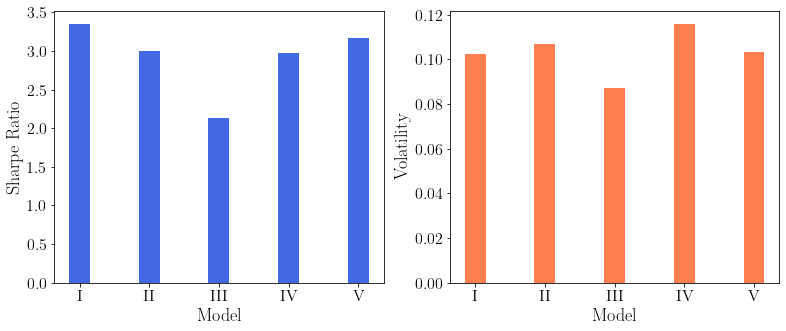

In [75]:
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc('font',size=16); rc('text', usetex=True)  #调用tex字库

plt.rcParams['figure.figsize'] = (13.0, 5)
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 18,
         }
# 按两行两咧显示
X = ['I', 'II', 'III', 'IV', 'V']
Y1 = [3.351128199924945, 2.996106287411055, 2.1328322218767726, 2.9719382029005064, 3.1720297640238218]
Y2 =[0.10238110992419902, 0.1069955267082206, 0.08696080385880804, 0.11588258112453977, 0.10325337077503187]
a = subplot(1,2,1) #在第一窗口显示
bar_width = 0.3 # 条形宽度

# 使用两bar 函数画出两组条形图
plt.bar(X, height=Y1, width=bar_width, color='royalblue')
plt.xlabel('Model',font1)
plt.ylabel('Sharpe Ratio',font1)

b = subplot(1,2,2) 
bar_width = 0.3 # 条形宽度
index = np.arange(len(X)) # 条形图的横坐标

# 使用两bar 函数画出两组条形图
plt.bar(X, height=Y2, width=bar_width, color='coral')
plt.xlabel('Model',font1)
plt.ylabel('Volatility',font1)
# savefig("上海数据投资分析图.jpg",dpi=300, bbox_inches='tight')
show()